# Description:-

##  Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict age. Further information, such as weather patterns and location (hence food  availability) may be required to solve the problem.

# Attribute Information:

## Given is the attribute name, attribute type, measurement unit, and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

# Name / Data Type / Measurement Unit / Description

## 1- Sex / nominal / -- / M, F, and I (infant)
## 2- Length / continuous / mm / Longest shell measurement
## 3- Diameter / continuous / mm / perpendicular to length
## 4- Height / continuous / mm / with meat in shell
## 5- Whole weight / continuous / grams / whole abalone
## 6- Shucked weight / continuous / grams / weight of meat
## 7- Viscera weight / continuous / grams / gut weight (after bleeding)
## 8- Shell weight / continuous / grams / after being dried
## 9- Rings / integer / -- / +1.5 gives the age in years

# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset into the tool.

In [2]:
df=pd.read_csv("abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# 3. Perform Below Visualizations.
## Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9629487390>,
      dtype=object)

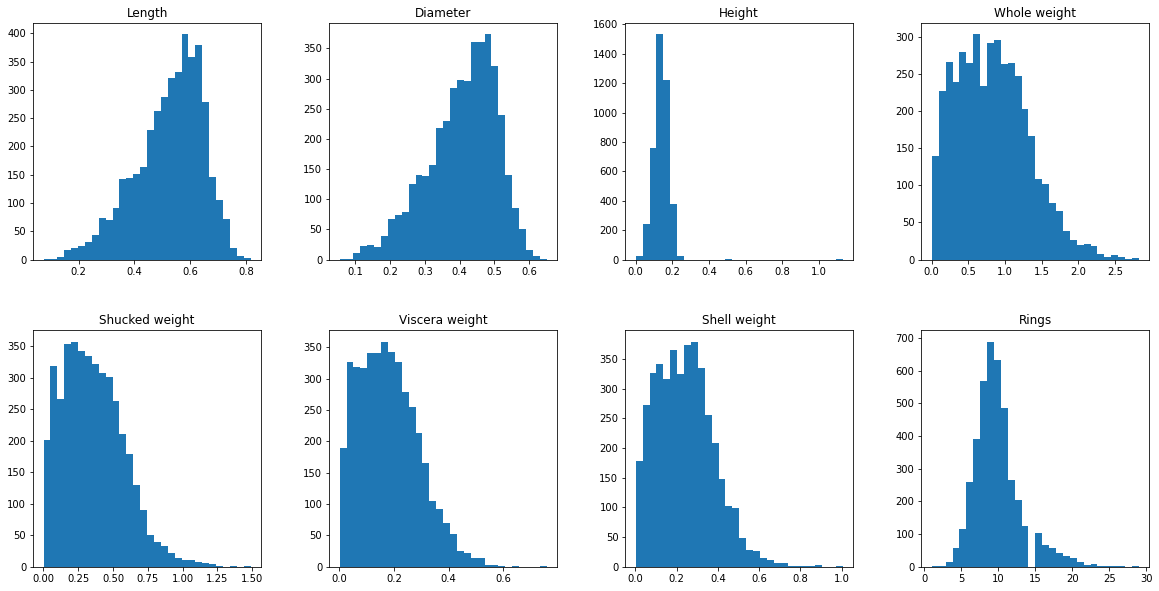

In [4]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


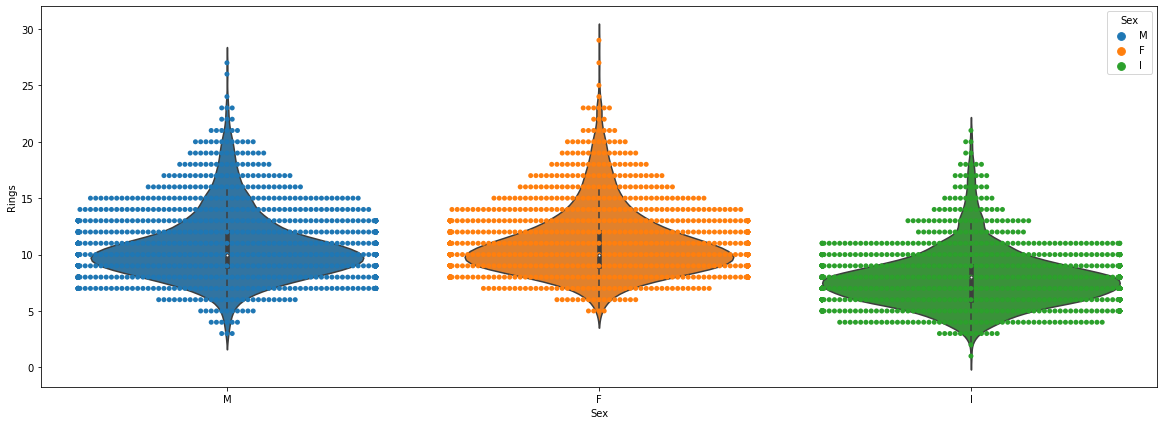

In [5]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Rings', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Rings', data = df)

In [6]:
numerical_features = df.select_dtypes(include=[np.number]).columns

In [7]:
from sklearn.model_selection import  train_test_split, cross_val_score


In [8]:
train, test = train_test_split(df, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 3132
Test data points : 1045


In [9]:
target = 'Rings'


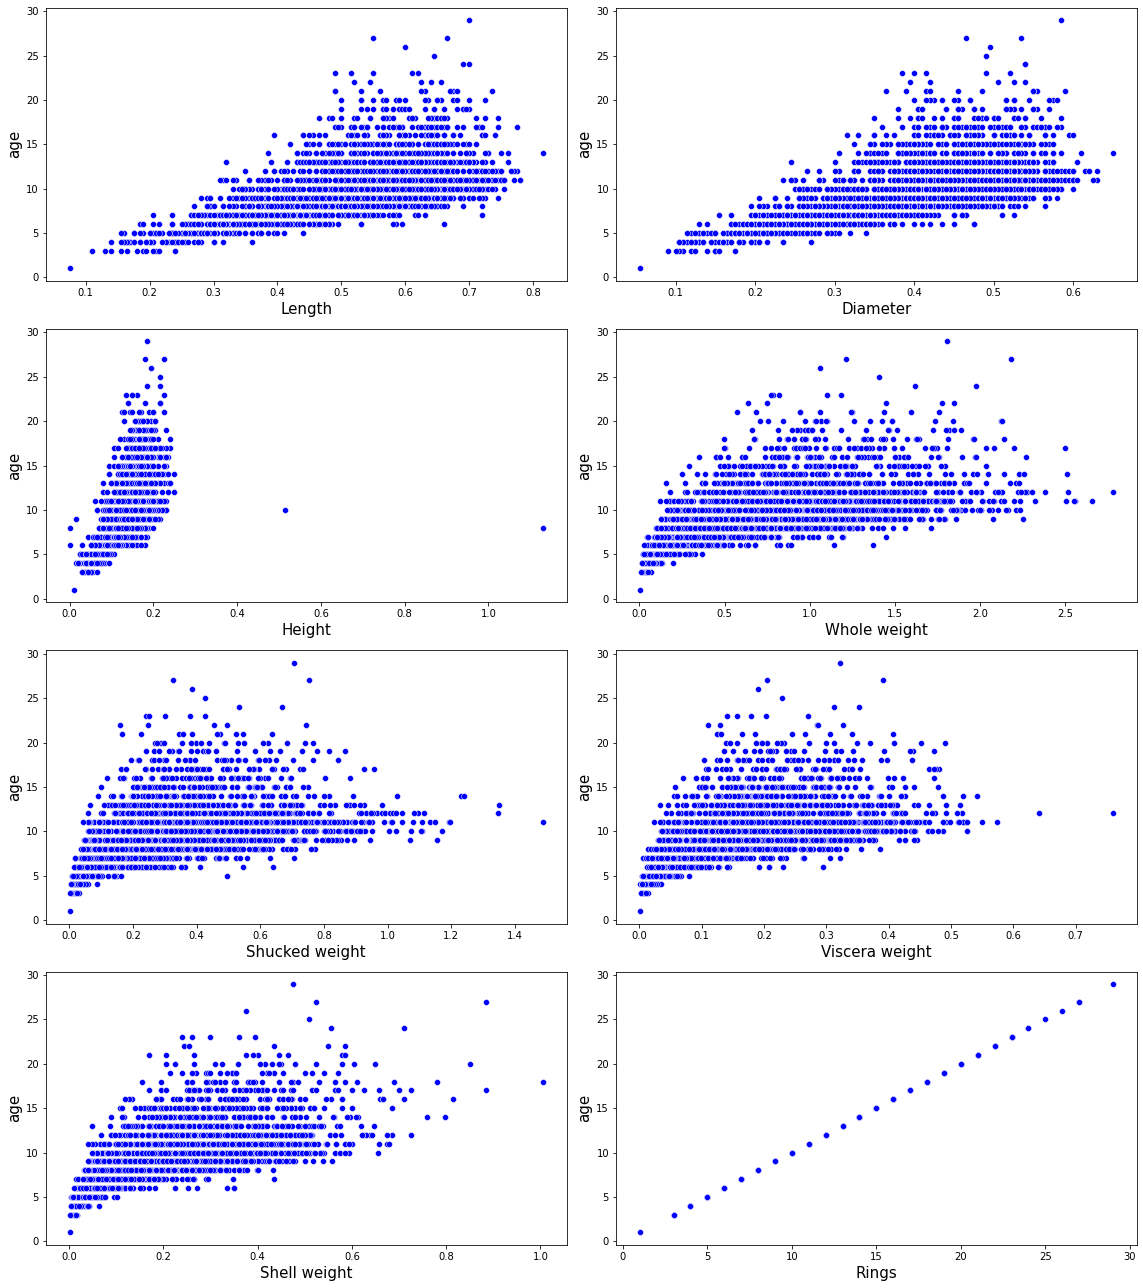

In [10]:
fig, axes = plt.subplots(4,2,figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    _ = sns.scatterplot(x=train[c],
                        y=train[target],
                        ax=axes[i],
                        color='blue')
    
    
    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel('age', fontsize=15)
    
plt.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


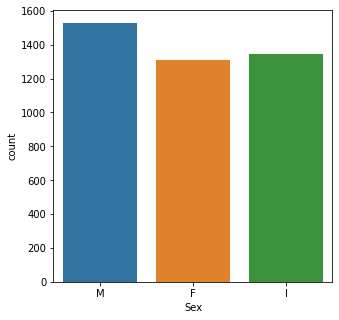

In [11]:
plt.figure(figsize=(5,5))
_ = sns.countplot(df.Sex)

##  Bi-Variate Analysis

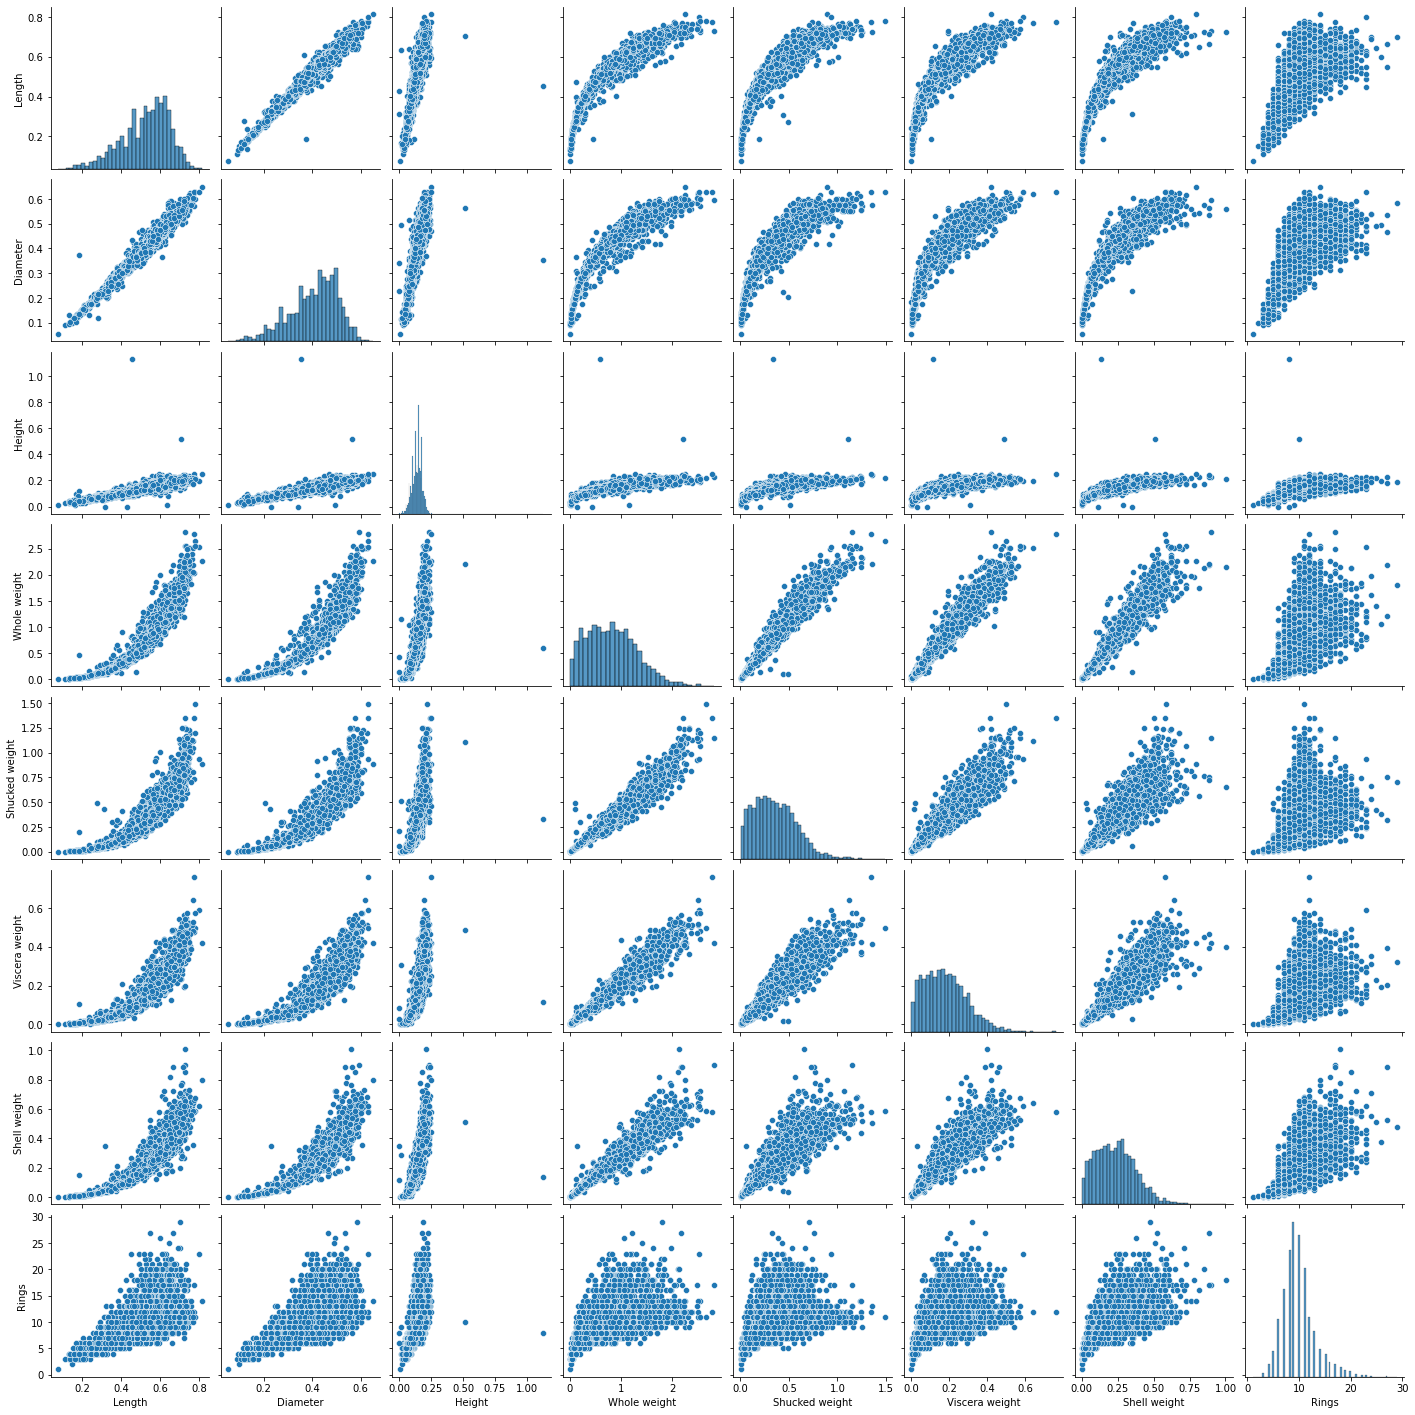

In [12]:
sns.pairplot(df[numerical_features])


## Multivariate Analysis

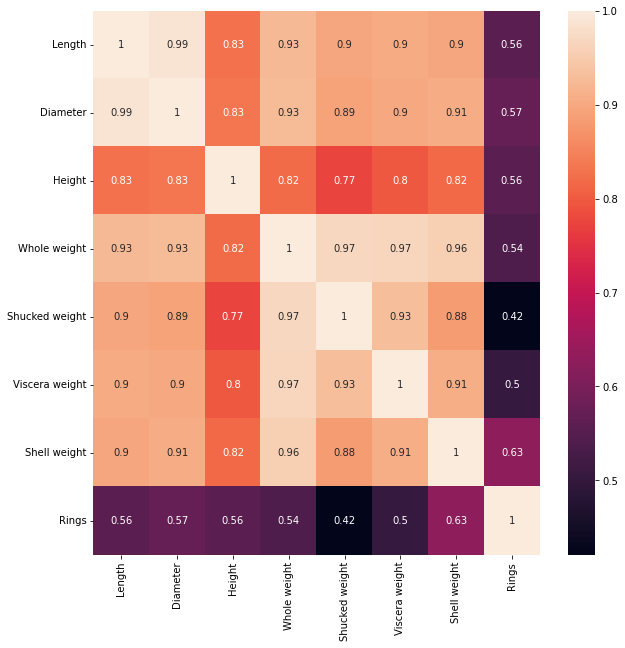

In [13]:
plt.figure(figsize=(10, 10))
corr = df.corr()
_ = sns.heatmap(corr, annot=True)

### Analyzing the correlation matrix, we notice that Height and Shell weight are the attributes that most correlates to Rings.

<Figure size 1440x360 with 0 Axes>

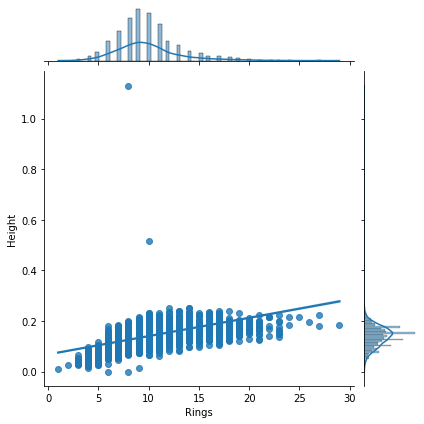

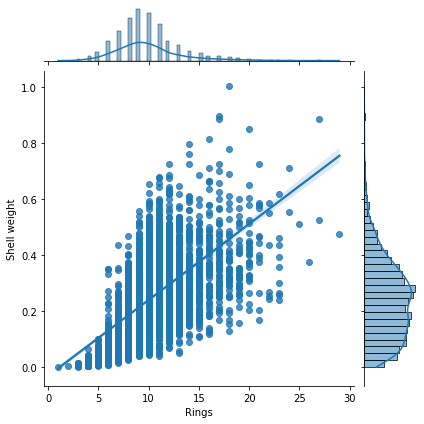

In [14]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=df, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=df, x='Rings', y='Shell weight', kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


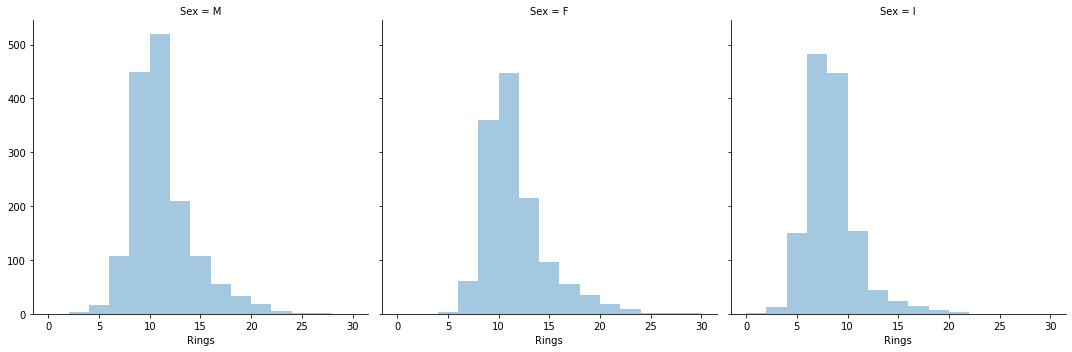

In [15]:
g = sns.FacetGrid(df, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


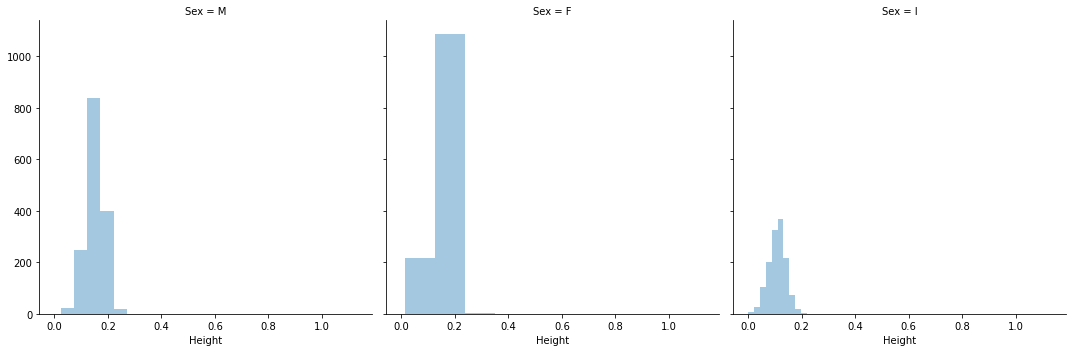

In [16]:
g = sns.FacetGrid(df, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


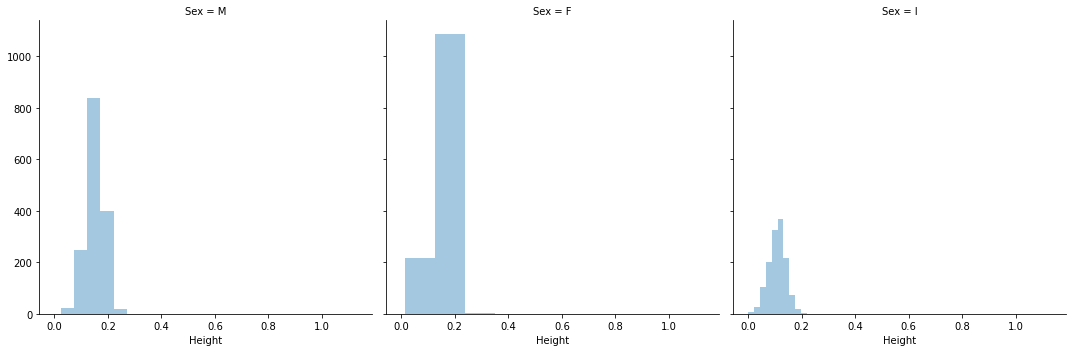

In [17]:
g = sns.FacetGrid(df, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

<Figure size 1440x360 with 0 Axes>

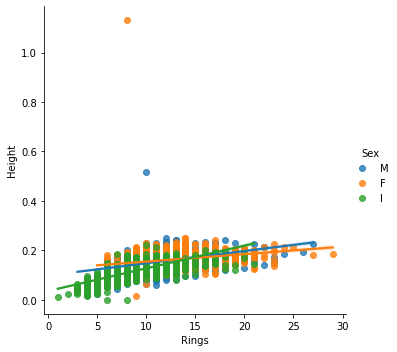

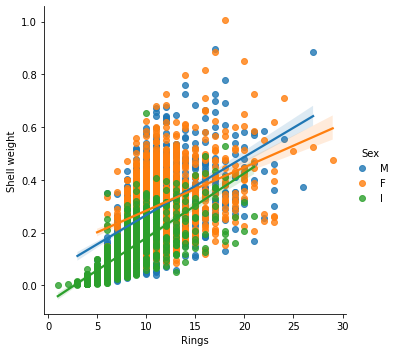

In [18]:
plt.figure(figsize=(20, 5))

_ = sns.lmplot(data=df, x='Rings', y='Height', hue='Sex', fit_reg=True)
_ = sns.lmplot(data=df, x='Rings', y='Shell weight', hue='Sex', fit_reg=True)

# 4. Perform descriptive statistics on the dataset.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [20]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [21]:
df.shape

(4177, 9)

In [22]:
df.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [23]:
df.describe(include="all")


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


## 5. Check for Missing values and deal with them.

In [24]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

###  Since There is no missing values in this dataset so we dont need to replace anything

### 6. Find the outliers and replace them outliers

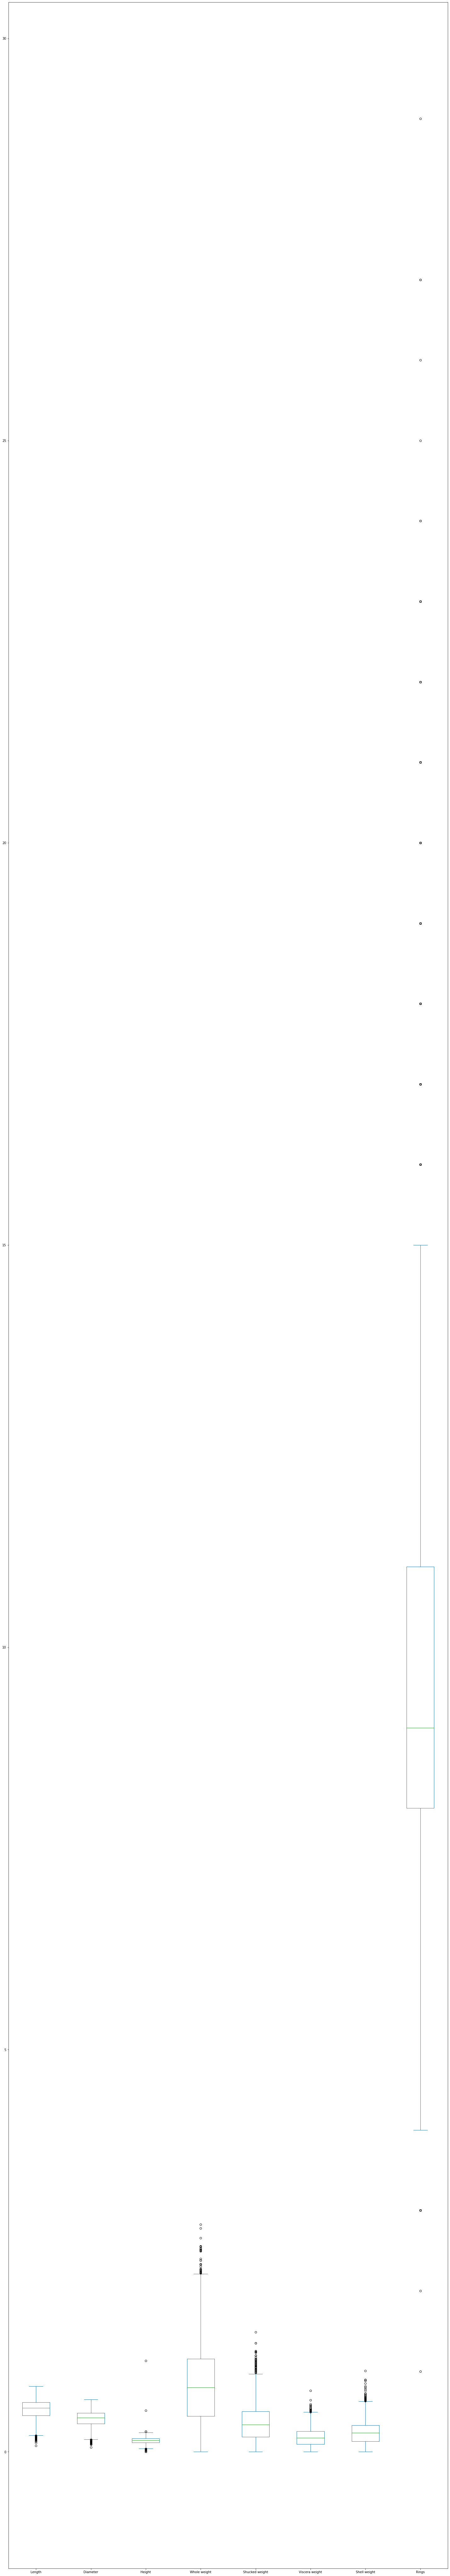

In [25]:
df.plot(kind="box", figsize=(25,150))

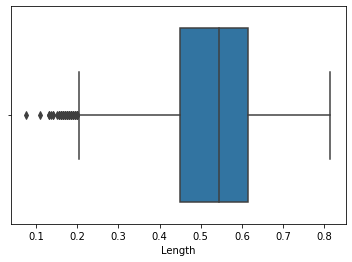

In [26]:
sns.boxplot(x="Length",data=df)

In [27]:
# IQR
Q1 = np.percentile(df['Diameter'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Diameter'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['Diameter'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Diameter'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (4177, 9)
New Shape:  (4118, 9)


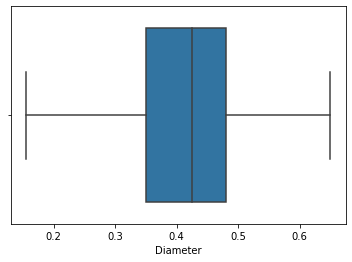

In [28]:
sns.boxplot(x="Diameter",data=df)

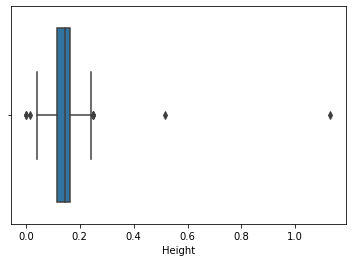

In [29]:
sns.boxplot(x="Height",data=df)

In [30]:
# IQR
Q1 = np.percentile(df['Height'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Height'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['Height'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Height'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (4118, 9)
New Shape:  (4110, 9)


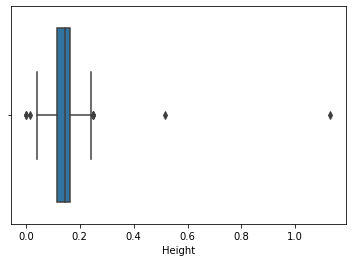

In [31]:
sns.boxplot(x="Height",data=df)

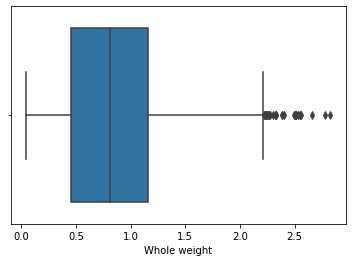

In [32]:
sns.boxplot(x="Whole weight",data=df)

In [33]:
# IQR
Q1 = np.percentile(df['Whole weight'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Whole weight'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['Whole weight'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Whole weight'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (4110, 9)
New Shape:  (4080, 9)


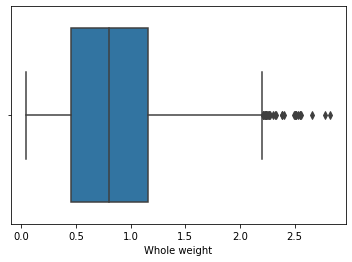

In [34]:
sns.boxplot(x="Whole weight",data=df)

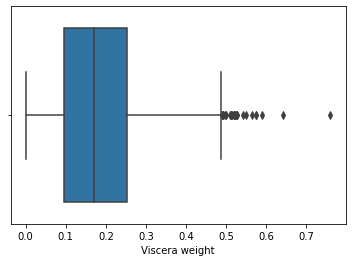

In [35]:
sns.boxplot(x="Viscera weight",data=df)

In [36]:
Q1 = np.percentile(df['Viscera weight'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Viscera weight'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['Viscera weight'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Viscera weight'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (4080, 9)
New Shape:  (4053, 9)


## 7. Check for Categorical columns and perform encoding.

In [37]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
  
df['Sex'].unique()

array([2, 0, 1])

In [38]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

## 8 Split the data into dependent and independent variables.

In [39]:
X = df.iloc[:, :-1]
print(X)

      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140   

In [40]:
Y = df.iloc[:, -1]
print(Y)

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4053, dtype: int64


## 9. Scale the independent variables

In [41]:
df_scaled = df.copy()
col_names = ['Sex', 'Length',  'Diameter','Height',  'Whole weight',  'Shucked weight', 
      'Viscera weight' , 'Shell weight']
features = df_scaled[col_names]


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
df_scaled[col_names] = scaler.fit_transform(features.values)

In [44]:
df_scaled

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.428571,0.424242,0.084071,0.169421,0.141935,0.132324,0.143287,15
1,1.0,0.261905,0.222222,0.079646,0.065756,0.057046,0.063199,0.063126,7
2,0.0,0.547619,0.535354,0.119469,0.227991,0.163667,0.185648,0.203407,9
3,1.0,0.404762,0.424242,0.110619,0.170140,0.135823,0.149440,0.148297,10
4,0.5,0.230159,0.202020,0.070796,0.058390,0.050255,0.051350,0.048096,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.603175,0.595960,0.146018,0.303450,0.240747,0.314022,0.242485,11
4173,1.0,0.642857,0.575758,0.119469,0.331836,0.287606,0.281764,0.254008,10
4174,1.0,0.658730,0.646465,0.181416,0.407294,0.346350,0.377880,0.301603,9
4175,0.0,0.698413,0.666667,0.132743,0.378009,0.350085,0.342989,0.289579,10


## 10. Split the data into training and testing

In [45]:
from sklearn.model_selection import train_test_split
 

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

## 11. Build the Model

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-1.25412529,  0.19391139,  0.19939468, ..., -0.48159165,
         0.03902176, -0.1130729 ],
       [-1.25412529, -0.20191529, -0.22543901, ..., -0.52260186,
         0.1911806 , -0.56320847],
       [-1.25412529,  1.6892566 ,  1.79252102, ...,  3.02705948,
         2.75021556,  2.17420133],
       ...,
       [-1.25412529,  0.14993065,  0.30560311, ..., -0.29021068,
         0.05285438,  0.1796982 ],
       [-0.04187896, -1.47735679, -1.18131481, ..., -1.11041484,
        -1.08603145, -1.21462418],
       [-1.25412529, -0.6417227 , -0.6502727 , ..., -0.64335414,
        -0.50967222, -0.77180788]])

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [90]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(Y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(Y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :4.895416
Mean Squared error of testing set :5.301581


In [92]:
from sklearn.metrics import r2_score
s = r2_score(Y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(Y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.51
R2 Score of testing set:0.48



##Ridge

In [93]:
from sklearn.linear_model import Ridge

In [94]:
ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(X_train, Y_train)
ridge_mod.fit(X_test, Y_test)
ridge_model_pred = ridge_mod.predict(X_test)
ridge_mod.score(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

0.49876458647889643

In [95]:
ridge_mod.score(X_test, Y_test)

0.48162084037363306

#RandomForestRegression

In [96]:
 from sklearn.ensemble import RandomForestRegressor

In [97]:
regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)

In [98]:
regr.fit(X_train, Y_train)
regr.fit(X_test, Y_test)

RandomForestRegressor(max_depth=2, random_state=0)

In [99]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

regr.score(X_train, Y_train)

0.38597799413448564

In [100]:
regr.score(X_test, Y_test)

0.412925194023124

##Gradient Boosting Regressor

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
gbr.fit(X_test, Y_test)

GradientBoostingRegressor()

In [102]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)


regr.score(X_train, Y_train)

0.38597799413448564

In [103]:
regr.score(X_test, Y_test)

0.412925194023124

##KNeighborsRegressor

In [117]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors =2 )
knn.fit(X_train, Y_train)
knn.fit(X_test, Y_test)

KNeighborsRegressor(n_neighbors=2)

In [118]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


knn.score(X_train, Y_train)

0.3585893354472246

In [119]:
knn.score(X_test, Y_test)


0.7866865976672901

In [120]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(X_train, Y_train)
knn.fit(X_test, Y_test)
knn.score(X_test, Y_test)

0.6642403158110738